<h1><center>Interpolation with high degree piecewise polynomials</center></h1>
<h1><center> Andreou Marios,Damianou Panayiota</center></h1>

___
$\underline {Description\ of\ the \ problem:}$

This project is concerned about the interpolation of "smooth-enough" functions, using high-order piecewise polynomials. Specifically, we assume that we want to approximate a given function $f(x)$ in an interval $[a, b]$, using piecewise polynomials of different degrees. Our goal is to see how good the approximations will be, if $f(x)$ has different degrees of smoothness or if we fluctuate the number of interpolation points or degree of the interpolating polynomials.

Let $f(x)$ be a given function in the interval $[a, b]$ and let $x_j, j = 0, 1,\dots,n$ be the nodal points that form a grid in the interval $[a, b]$, i.e. $a=x_0 < x_1 < \dots < x_n=b$, with mesh length $h_j = x_{j + 1} - x_j, j = 0, 1,\dots, n - 1$. Each subinterval $[x_j, x_{j+1}]$, $j = 0, 1,\dots,n-1$ is further divisible into $m$ equidistant length intervals, with length $\delta_j = \frac{h_j}{m} $, using the points $z_{j,0},z_{j,2},\dots,z_{j,m}$, where the first index showcases the interval that this partition "lives in". This points, will be the ones that will be used to interpolate $f(x)$ in $[x_j, x_{j+1}]$, with a polynomial of degree $m$.

Let $p_m^j(x)$ be the degree $m$ interpolation polynomial; $p_m^j\in\mathbb{R}_m[x]$, of $f(x)$ in the interval $[x_j, x_{j + 1}], \ \forall j=0,\dots,n-1$, i.e. 

\begin{equation*}
f(z_{j,i})=p_m^j(z_{j,i}) \     ,\ i=0,\dots,m.
\end{equation*}

The piecewise interpolation polynomial of $f(x)$ in the interval $[a, b]$ is defined as $l_m^n(x)$, with

\begin{equation*}
l_m^n(x)=p_m^j(x)  \text{ where } x\in[x_j,x_{j+1}].
\end{equation*}

We observe that, in general, $l_m^n$ for any $n,m\in\mathbb{N}$ is a continuous function at $[a, b]$, as it is an $m$ degree polynomial in the subintervals of $[a,b]$. The only problem arises when we are investigating the derivatives of this function because at the nodal points of the partition $\mathbb{X}$ of $[a,b]$, this function changes formula, and due to how the interpolation algorithm calculates the interpolating polynomials in the subintervals, unlike splines which are more "well-behaved" by nature, these polynomials are not calculated to be more smooth than continuous at the nodal points $\{x_j\}_{j=0}^n$.

Now we will prove the following theorem that we will revisit later on:

For $f\in C^{m+1}([a,b])$, where $m,n\in\mathbb{N}$ and $\delta=\underset{0\leq j\leq n-1}{\max}\left\{\frac{h_j}{m}\right\}$ then:
\begin{equation} \label{eq:1} \tag{*}
\|E_m^n(f)\|_{\infty} = \|f-l_m^n\|_{\infty}  \le \frac{1}{4(m+1)}\delta^{m+1}\|f^{(m+1)}\|_{\infty}
\end{equation}

Here, if the $\mathbb{X}$ partition of $[a,b]$, is _**uniform**_ then:
\begin{equation*} 
\delta=\underset{0\leq j\leq n-1}{\max}\left\{\frac{h_j}{m}\right\}\underset{\forall 0\ge j\le n-1}{\overset{\because h_j=\frac{b-a}{n}}{=}}\frac{b-a}{mn}
\end{equation*}

We want to see if the asymptotic convergence rate (\ref{eq:1}) of theorem above, is observed in practice, as well as what happens if we increase m instead of n, i.e. use higher degree of polynomials in each subdivision instead of increasing the number of uniform subdivisions. These questions will be answered through numerical calculations which means we will validate this empirically, which can be done in Python. But first, we need to write some functions, as we will see later on, after this preliminary proof.

For this result, we will use a common theorem from normal polynomial interpolation, which we will prove as well. Here we use the notation presented above, even if somewhat awkward, just to make its application much more clearer.

For $f\in C^{m+1}([x_j,x_{j+1}])$ and let $p_m^j(x)$, be the $m^{th}$-degree polynomial that interpolates $f$ in the interval $[x_j,x_{j+1}]$, at the points: $\{z_{j,0},\dots,z_{j,m}\}$, that are a uniform mesh in the aforementioned interval. Then, the following upper bound for the uniform-norm of the error term, holds:

\begin{equation} \label{eq:2} \tag{**}
||E_{m}(f)||_{\infty} = \|f-p_m^j\|_{\infty} \le \frac{1}{4(m+1)}\left(\frac{b-a}{m}\right)^{m+1}||f^{(m+1)}||_{\infty}
\end{equation}

___
\begin{proof}
It is a common result that the error term of interpolation of $f$ by $p_m^j$ can be expressed as: 

\begin{equation*}
E_m(f)(x)=\frac{w_m(x)}{(m+1)!}f^{(m+1)}(ξ_x), \ \forall x\in [x_j,x_{j+1}] \text{ and } ξ_x\in[x_j,x] 
\end{equation*}

So, the following upper-bound inequality holds:

\begin{equation*}
\|E_m(f)\|_{\infty}\le\frac{\|w_m\|_{\infty}}{(m+1)!}\|f^{(m+1)}\|_{\infty} 
\end{equation*}

We have that for every $k\in\{0,1,\dots,m\}$:  $w_m(z_k^j)=0$ where $z^j_0=x_j$ and $z^j_m=x_{j+1}$. 

Lets assume that $ x \in [x_j,x_{j+1}]\setminus\{z^j_k\}_{k=0}^m \Rightarrow \exists!$ $k\in\{0,1,\dots,m-1\} $ such that $x \in (z^j_k,z^j_{k+1})$.

It is easy to see that: 

\begin{equation} \label{eq:proof1}\tag{1}
|(x-z^j_k)(x-z^j_{k+1})|\leq\frac{h^2}{4} \text{ for this exact }x\in(z^j_k,z^j_{k+1})\text{ where } h=\frac{x_{j+1}-x_j}{m} 
\end{equation}

So, 

\begin{align*}
|w_m(x)|&=\left|\prod_{i=0}^m (x-z^j_i)\right|=\left|\prod_{i=0}^{k-1}(x-z^j_{i})\right|\cdot|(x-z^j_k)(x-z^j_{k+1})|\cdot\left|\prod_{i=k+2}^m (x-z^j_i)\right|\\
\Rightarrow |w_m(x)| &\leq \frac{h^2}{4}\left(\prod_{i=0}^{k-1}(x-z^j_i)\right)\left(\prod_{i=k+2}^m (z^j_i-x)\right), \ \because (\ref{eq:proof1}) \text{ and } x<z^j_{k+1}=z^j_0+(k+1)h \ \& \ -x<-z^j_{k}=-z^j_0-kh  \\
\Rightarrow |w_m(x)| &\leq \frac{h^2}{4}\left(\prod_{i=0}^{k-1}(k+1-i)h\right)\left(\prod_{i=k+2}^m h(i-k)\right)\\
\Rightarrow |w_m(x)| &\leq \frac{h^{2+k+m-k-2+1}}{4}\prod_{i=0}^{k-1}(k+1-i)\prod_{i=k+2}^m (i-k), \ \because \text{ there are k-terms in the first product and m-(k+2)+1 terms in the second one} \\
\Rightarrow |w_m(x)| &\leq \frac{h^{m+1}}{4}(k+1)!(m-k)!
\end{align*}

\begin{equation*}
\therefore |w_m(x)| \leq \frac{h^{m+1}}{4}m!, \ \because k(\in\{0,\dots,m-1\})<m, \ \therefore (k+1)!(m-k)!\le m!
\end{equation*}

So plugging the above in the previous upper bound for the supremum-norm of the error term, we are left with the desired result:

\begin{equation*} 
||E_{m}(f)||_{\infty} \le \frac{1}{4(m+1)}\left(\frac{b-a}{m}\right)^{m+1}||f^{(m+1)}||_{\infty}
\end{equation*}
\end{proof}

And now back to the theorem that we intended to prove in the beginning:

For $f\in C^{m+1}([a,b])$, where $m,n\in\mathbb{N}$ and $\delta=\underset{0\leq j\leq n-1}{\max}\left\{\frac{h_j}{m}\right\}$ (where $\delta=\frac{b-a}{mn}$ for $\mathbb{X}$ uniform) then:
\begin{equation} \label{eq:3} \tag{*}
\|E_m^n(f)\|_{\infty} = \|f-l_m^n\|_{\infty}  \le \frac{1}{4(m+1)}\delta^{m+1}\|f^{(m+1)}\|_{\infty}
\end{equation}

\begin{proof}
\begin{align*}
|E_{m}^n(f)(x)|=|f(x)-l_m^n(x)|&\leq\underset{0\leq j \leq n-1}{max}\left\{\underset{x \in [x_j,x_{j+1}]}{max}\left\{|f(x)-p_m^j(x)|\right\}\right\}\\
&=\underset{0\leq j \leq n-1}{max}\left\{\underset{0\leq k\leq m-1}{max}\left\{\|f-p_m^j\|_{L^{\infty}([z^j_k,z^j_{k+1}])}\right\}\right\}\\
\text{From the theorem above (\ref{eq:2})}\\
\text{(we use it directly as}\\
\text{the notation is exactly the same):}\\
& \leq \underset{0 \leq j \leq n-1}{max}\left\{\frac{1}{4(m+1)}\delta_j^{m+1}\|f^{(m+1)}\|_{L^{\infty}([x_{j},x_{j+1}])}\right\}, \ \because \text{ of supremum's properties} \\
& =\frac{\delta^{m+1}}{4(m+1)}\underset{0 \leq j \leq n-1}{max}\left\{\|f^(m+1)\|_{L^{\infty}([x_{j},x_{j+1}])}\right\}, \ \because  \text{ of supremum's properties and } \delta\geq0 \ \& \ g(x)=x^{m+1} \nearrow \\
& =\frac{\delta^{m+1}}{4(m+1)}M_{m+1} = \frac{(b-a)^{m+1}}{4(m+1)m^{m+1}n^{m+1}}M_{m+1}
\end{align*}
\end{proof}

From the theorem that we proved above, we can see that as a function of $n$ we can safely say that:

\begin{equation} \label{eq:4} \tag{***}
\|E_m^n\|{\infty} \in \mathcal{O}(n^{m+1})
\end{equation}

As such, the error above for $m$ **constant** will $\rightarrow 0$ as $n\rightarrow\infty$, if of course the $m+1^{th}$ derivative of $f$ is bounded in $[a,b]$. We see an example of this below for the function $f(x)=exp\left(\frac{1}{x^2}\right)$, were some of its derivatives are (in order of first degree to 5th): 

1. $-\dfrac{2\mathrm{e}^\frac{1}{x^2}}{x^3}$

2. $\dfrac{6\mathrm{e}^\frac{1}{x^2}}{x^4}+\dfrac{4\mathrm{e}^\frac{1}{x^2}}{x^6}$

3. $-\dfrac{6\left(6x^2+4\right)\mathrm{e}^\frac{1}{x^2}}{x^7}-\dfrac{2\left(6x^2+4\right)\mathrm{e}^\frac{1}{x^2}}{x^9}+\dfrac{12\mathrm{e}^\frac{1}{x^2}}{x^5}$

4. $\dfrac{9\left(24x^4+36x^2+8\right)\mathrm{e}^\frac{1}{x^2}}{x^{10}}+\dfrac{2\left(24x^4+36x^2+8\right)\mathrm{e}^\frac{1}{x^2}}{x^{12}}-\dfrac{\left(96x^3+72x\right)\mathrm{e}^\frac{1}{x^2}}{x^9}$

5. $-\dfrac{12\left(120x^6+300x^4+144x^2+16\right)\mathrm{e}^\frac{1}{x^2}}{x^{13}}-\dfrac{2\left(120x^6+300x^4+144x^2+16\right)\mathrm{e}^\frac{1}{x^2}}{x^{15}}\\+\dfrac{\left(720x^5+1200x^3+288x\right)\mathrm{e}^\frac{1}{x^2}}{x^{12}}$

We see that for all of these, because $e^x>>x^k, \ \forall k\in\mathbb{N}$, these derivatives are NOT bounded in $[-1,1]$, as such, we do not have an upper bound for the error term, so we don't now if the appoximation converges. This should be expected due to the fact that these function are not even continuous in $[-1,1]$, so the theorem above does not hold, and we dont have any information about the convergece of the piecewise polynomial of degree $m$ to $f$.

$\underline {Python\ Function:}$

More results and observations are discussed later. For now, we create the function that will approximate $\|f-l_m^n\|_{\infty}$ for a given function $f$.

This function outputs the approximation of the uniform norm of the interpolation error term calculated at s points in the interval $[a,b]$. It also takes as input the function that we want to interpolate ($f$) as well as the number of subintervals ($n$)  and the degree of the "sub"-polynomials that interpolate $f$ in the $n$ subintervals of the form $[x_j,x_{j+1}]$ where $0\leq j \leq n-1$ at $m+1$ points, where $m$ is the degree of the "sub"-polynomials of the piecewise polynomial $l_m^n(x)$. The function also outputs (in conjunction with the maximum absolute error term which approximates the uniform-norm), the points that were used to evaluate the error term (so we can plot it using matplotlib), as well as $\delta$ (as defined above) and all of the absolute errors calculated.

In [1]:
%matplotlib inline

import numpy as np
from numpy.polynomial.polynomial import polyfit
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import scipy
import sympy
import itertools
import warnings
import functools
import math
warnings.filterwarnings('ignore')

def pairwise(iterable):
    """This function is used to create pairwise pairs
    for the input iterable. An example is given below."""
    # pairwise('ABCDEFG') --> AB BC CD DE EF FG
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

def piecewise_interp_error(f,a,b,num_subintervals,degree_poly,s):
    """This function outputs the approximation of the uniform norm of the 
    interpolation error term calculated at s points in the interval [a,b]. 
    It also takes as input the function that we want to interpolate(f) as 
    well as the number of subintervals(n) and the degree of the "sub"-polynomials 
    that interpolate f in the n subintervals of the form [x_j,x_{j+1}] where 
    0<=j<=n-1 at m+1 points, where m is the degree of the "sub"-polynomials of the 
    piecewise polynomial l_m^n(x). The function also outputs (in conjunction with 
    the maximum absolute error term which approximates its uniform-norm), the points
    that were used to evaluate the error term (so we can plot it using matplotlib), 
    as well as delta and all of the absolute errors calculated."""
    # Checking that our inputs meet all the necessary criteria.
    if (not isinstance(num_subintervals,int) or not isinstance(degree_poly,int) 
        or not isinstance(s,int) or num_subintervals<1 or degree_poly<1 or s<=degree_poly+1
        or a>=b or not callable(f)):
        print("Oh no! Something went wrong. Try again!")
        return message

    x = np.linspace(a,b,num_subintervals+1)
    # Creating the uniform partition of [a,b] of n+1 points.
    subinterval_partitions = [np.linspace(subinterval[0], subinterval[1], degree_poly+1) for subinterval in pairwise(x)]
   
    # Finding the maximum of the delta_j's, but for a uniform mesh all delta_j's are equal to exactly
    # (b-a)/(n*m), so essentially, delta=(b-a)/(n*m). This is used, in the case that the user want to
    # implement a non-uniform mesh of [a,b].
    delta = max([(subinterval[1]-subinterval[0])/degree_poly for subinterval in pairwise(x)])
    
    # Here we calculate the "sub"-polynomial of our piecewise polynomial l_m^n(x) in every single
    # subinterval of the form [x_j,x_{j+1}], for 0<=j<=n-1
    subinterval_poly = []
    for subpartition in subinterval_partitions:
        y= [f(z) for z in subpartition]
        subinterval_poly.append(polyfit(subpartition,y,degree_poly))
    
    # Calculating the points that we will evaluate the error term on, in each subinterval; s (as well as n
    # - but most importantly s) needs be big enough such as this approximates the infinity-norm of the error 
    # between the function we interpolate and our piecewise polynomial. At the end, we calculate the error term 
    # at (s-1)*n+1 DISTINCT points.
    points_evaluation_full = [np.linspace(subinterval[0], subinterval[1], s) for subinterval in pairwise(x)]
    errors=[]
    for poly, points_evaluation in zip(subinterval_poly, points_evaluation_full):
        errors_subinterval = np.array([f(p) for p in points_evaluation]) - Polynomial(poly.tolist())(points_evaluation)
        errors += errors_subinterval.tolist()
    absolute_errors = [abs(error) for error in errors]
    return (functools.reduce(lambda x, y: np.concatenate((x,y)), points_evaluation_full), absolute_errors, max(absolute_errors), delta)   

___

$\underline {Checking\ the\ output\ of\ the\ function\ on\ polynomials:}$

Now, we will check if our function interpolates "perfectly" polynomials of degree of $\leq m$, as is expected. This means, that the approximation of the uniform-norm of the error that our function outputs should be of magnitude of $10^{-16}$.

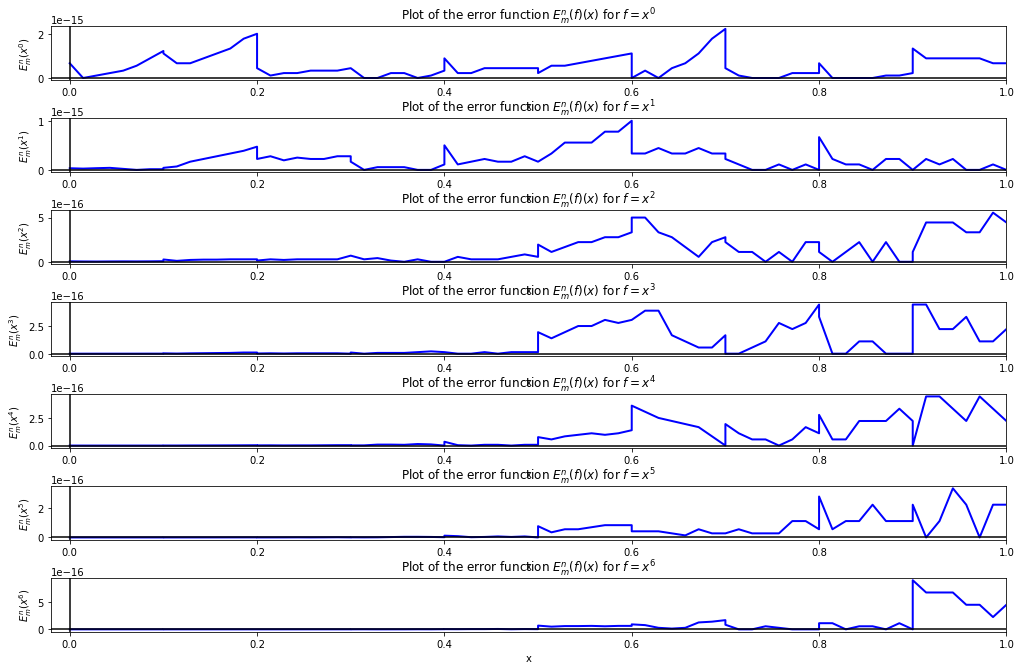

In [2]:
# Checking if polynomials with degree <=6 are interpolated "perfectly" by our polynomial
# l_m^n(x) with m-degree "sub"-polynomials, where m=6
fig, ax = plt.subplots(7, 1, figsize=(14,9))
fig.tight_layout()
fig.subplots_adjust(hspace=.7)
for i in range(7):                                                               #  V Change function if you want
    x_points, absolute_errors, max_error, delta = piecewise_interp_error(lambda x: x**i,0,1,10,6,8)
                                                                                      # ^ - in order: a,b,n,m,s  
    ax[i].plot(x_points, absolute_errors, linewidth=2, color='blue')
    ax[i].set_xlim(-0.02,1)
    ax[i].axhline(0, color='black')
    ax[i].axvline(0, color='black')
    ax[i].set_xlabel("x")
    ax[i].set_ylabel(fr"$E_m^n(x^{i})$")
    ax[i].set_title(fr"Plot of the error function $E_m^n(f)(x)$ for $f=x^{i}$")

So, the statement above is validated.

___

$\underline {m\ constant\ \in\mathbb{N}\ while\ n\rightarrow\infty:}$

Now, on to analytic functions; due to the form of the upper bound at (\ref{eq:3}) and (\ref{eq:4}), we know that for constant $m\in\mathbb{N}$, that as $n$ tends to infinity, because $M_{m+1}<+\infty$, the error term will squeeze to zero. The rate of the convergence, as given by its Big-O, will be polynomial with degree of $m+1$. Not only that, but for high $n$, we can see that, for some $C>0$ not dependent by n:

\begin{equation*}
\|E_m^n(f)\|_{\infty}\approx C\delta^{m+1}
\end{equation*}

where this approximation becomes an equality even for "smaller" n, as we will see next to be correct ($n\approx100$).

Now, if we "log" both sides of the above relation, we can see that:

\begin{equation*}
log(\|E_m^n(f)\|_{\infty})=log(C)+(m+1)log(\delta)
\end{equation*}

This shows us, that if we plot the $log(\|E_m^n(f)\|_{\infty})$ against $log(\delta)$, we should see a line arise, of positive slope equal to $m+1$, which tells us that as delta increases (because $log$ is an increasing function) so does the uniform-norm of the error. This should not surprise us, because if delta increases, this means that $n$ decreases which means we take less sub-intervals and as we saw this increases the upper bound for the uniform-norm of the error term. We validate these, for the values $m=2$ and $m=3$ and we take the error terms for $n=1,2,\dots,100$, as this range for n suffices to see the results that we want.

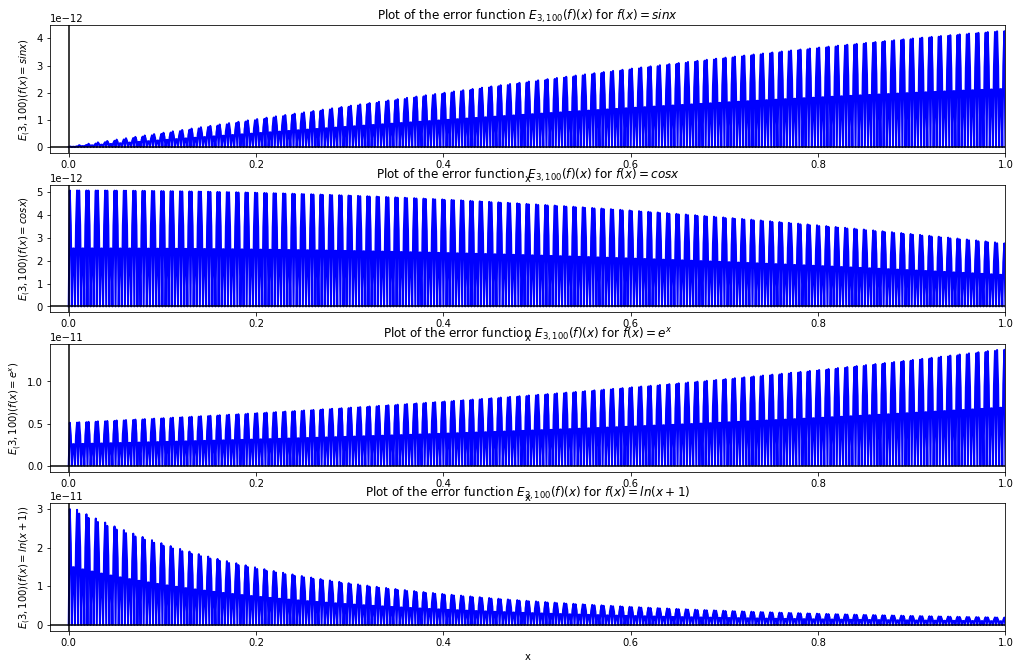

In [3]:
# From the theory, we know for functions that are "as smooth as possible" in [a,b] (that is, they
# are essentially analytic or C^∞) the uniform-norm of the error tems tends to zero as n->∞.
# This is proven, for some analytic functions below, where we see that the graph of the error term
# is of the order of 10^-12 and 10^-11, even for n=100 and m=3.
funs = [lambda x: math.sin(x), lambda x: math.cos(x), lambda x: math.exp(x), lambda x: math.log(x+1)]
graph_names = [r"$f(x)=sinx$",r"$f(x)=cosx$",r"$f(x)=e^x$",r"$f(x)=ln(x+1)$"]
deltas, errors = [], []
fig, ax = plt.subplots(4, 1, figsize=(14,9))
fig.tight_layout()
for (i, f), f_name in zip(enumerate(funs),graph_names):
    deltas.append([piecewise_interp_error(f,0,1,n,3,5)[-1] for n in range(1,101)])
    errors.append([piecewise_interp_error(f,0,1,n,3,5)[-2] for n in range(1,101)])
    points_100, absolute_errors_100 = piecewise_interp_error(f,0,1,100,3,10)[:2]
    ax[i].plot(points_100, absolute_errors_100, linewidth=2, color='blue')
    ax[i].set_xlabel("x")
    ax[i].set_ylabel(fr"$E_{3,100}$("+f_name+")")
    ax[i].set_xlim(-0.02,1)
    ax[i].axhline(0, color='black')
    ax[i].axvline(0, color='black')
    ax[i].set_title(r"Plot of the error function $E_{3,100}(f)(x)$ for "+f_name)

The slope is: 3.9788910297862228, for the graph number 1
The slope is: 4.00385310878901, for the graph number 2
The slope is: 4.011602451870078, for the graph number 3
The slope is: 3.980019616847506, for the graph number 4


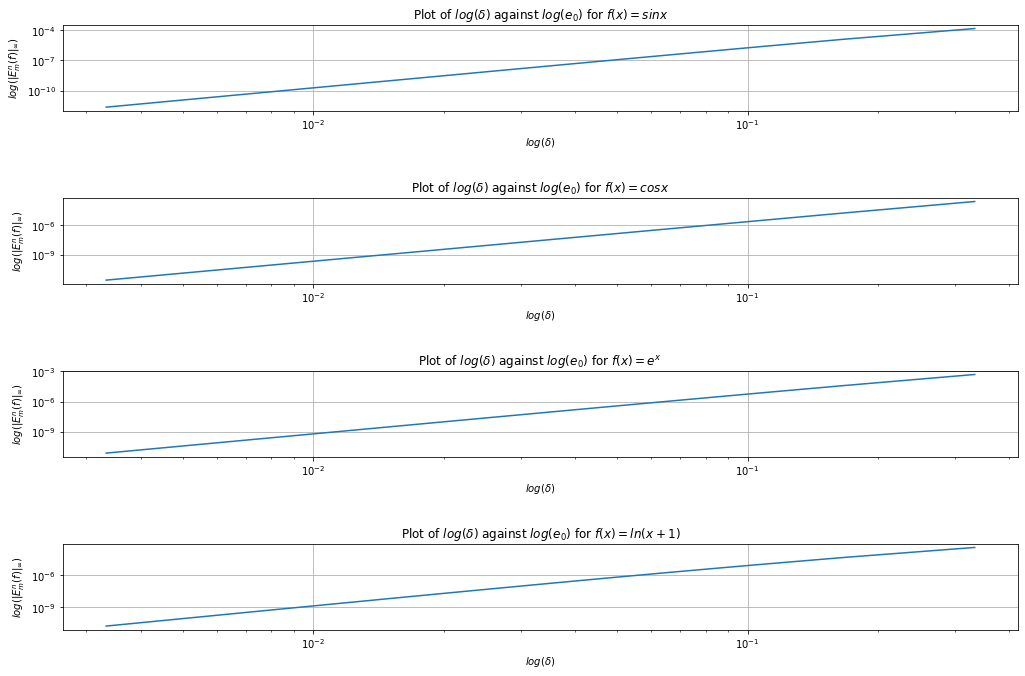

In [4]:
# From the theory, we know for functions that are "as smooth as possible" in [a,b], essentially they are
# analytic or C^∞, the uniform-norm of the error tems tends to zero as n->∞. Not only that, but due to
# the theorem we proved above, we know that ||E_{m,n}(f)||_∞≈Cδ^{m+1}=:e_0, so the graphs below should
# theoretically give us a line that should have a slope of m+1 and that would show that as δ increases
# (thus m decreases), then the error should increase, which is exactly what we observe!
fig, ax = plt.subplots(4, 1, figsize=(14,9))
fig.tight_layout()
fig.subplots_adjust(hspace=1)
for j in range(4):
    slope=(math.log(errors[j][-1])-math.log(errors[j][-2]))/(math.log(deltas[j][-1])-math.log(deltas[j][-2]))
    print(f"The slope is: {slope}, for the graph number {j+1}")
    ax[j].loglog(deltas[j],errors[j])
    ax[j].set_title(fr"Plot of $log(\delta)$ against $log(e_0)$ for "+graph_names[j])
    ax[j].set_xlabel(r"$log(\delta)$")
    ax[j].set_ylabel(r"$log(\|E_m^n(f)\|_{\infty})$")
    ax[j].grid(True)

The slope is: 2.9999778798343084, for the graph number 1
The slope is: 2.997144699378922, for the graph number 2
The slope is: 2.9955990616795423, for the graph number 3
The slope is: 2.9868999285698394, for the graph number 4


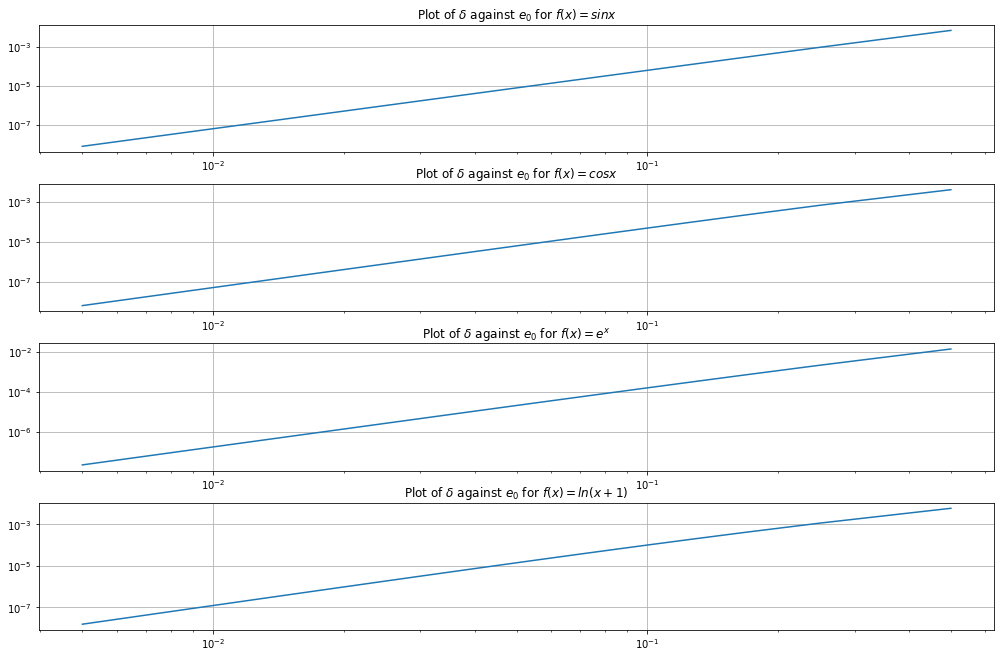

In [5]:
# Repeating the process for m=2 just to make sure, there is nothing more to it here.
deltas, errors = [], []
for i, f in enumerate(funs):
    deltas.append([piecewise_interp_error(f,0,1,n,2,5)[-1] for n in range(1,101)])
    errors.append([piecewise_interp_error(f,0,1,n,2,5)[-2] for n in range(1,101)])
fig, ax = plt.subplots(4, 1, figsize=(14,9))
fig.tight_layout()
for j in range(4):    
    slope=(math.log(errors[j][-1])-math.log(errors[j][-2]))/(math.log(deltas[j][-1])-math.log(deltas[j][-2]))
    print(f"The slope is: {slope}, for the graph number {j+1}")
    ax[j].loglog(deltas[j],errors[j])
    ax[j].set_title(fr"Plot of $\delta$ against $e_0$ for "+graph_names[j])
    ax[j].grid(True)
    
# WE SEE ALL DELTAS ARE REALLY CLOSE TO 3=2+1=m+1

Now, we will revisit what we mentioned briefly above. 

We mentioned above, at (\ref{eq:4}), that:

\begin{equation*}\tag{***}
\|E_m^n(f)\|{\infty} \in \mathcal{O}(n^{m+1})
\end{equation*}

As such, the error term for $m$ **constant** will $\rightarrow 0$ as $n\rightarrow\infty$, if of course the $m+1^{th}$ derivative of $f$ is bounded in $[a,b]$. Now we see the example of a function that is NOT analytic in the domain that we try to interpolate.

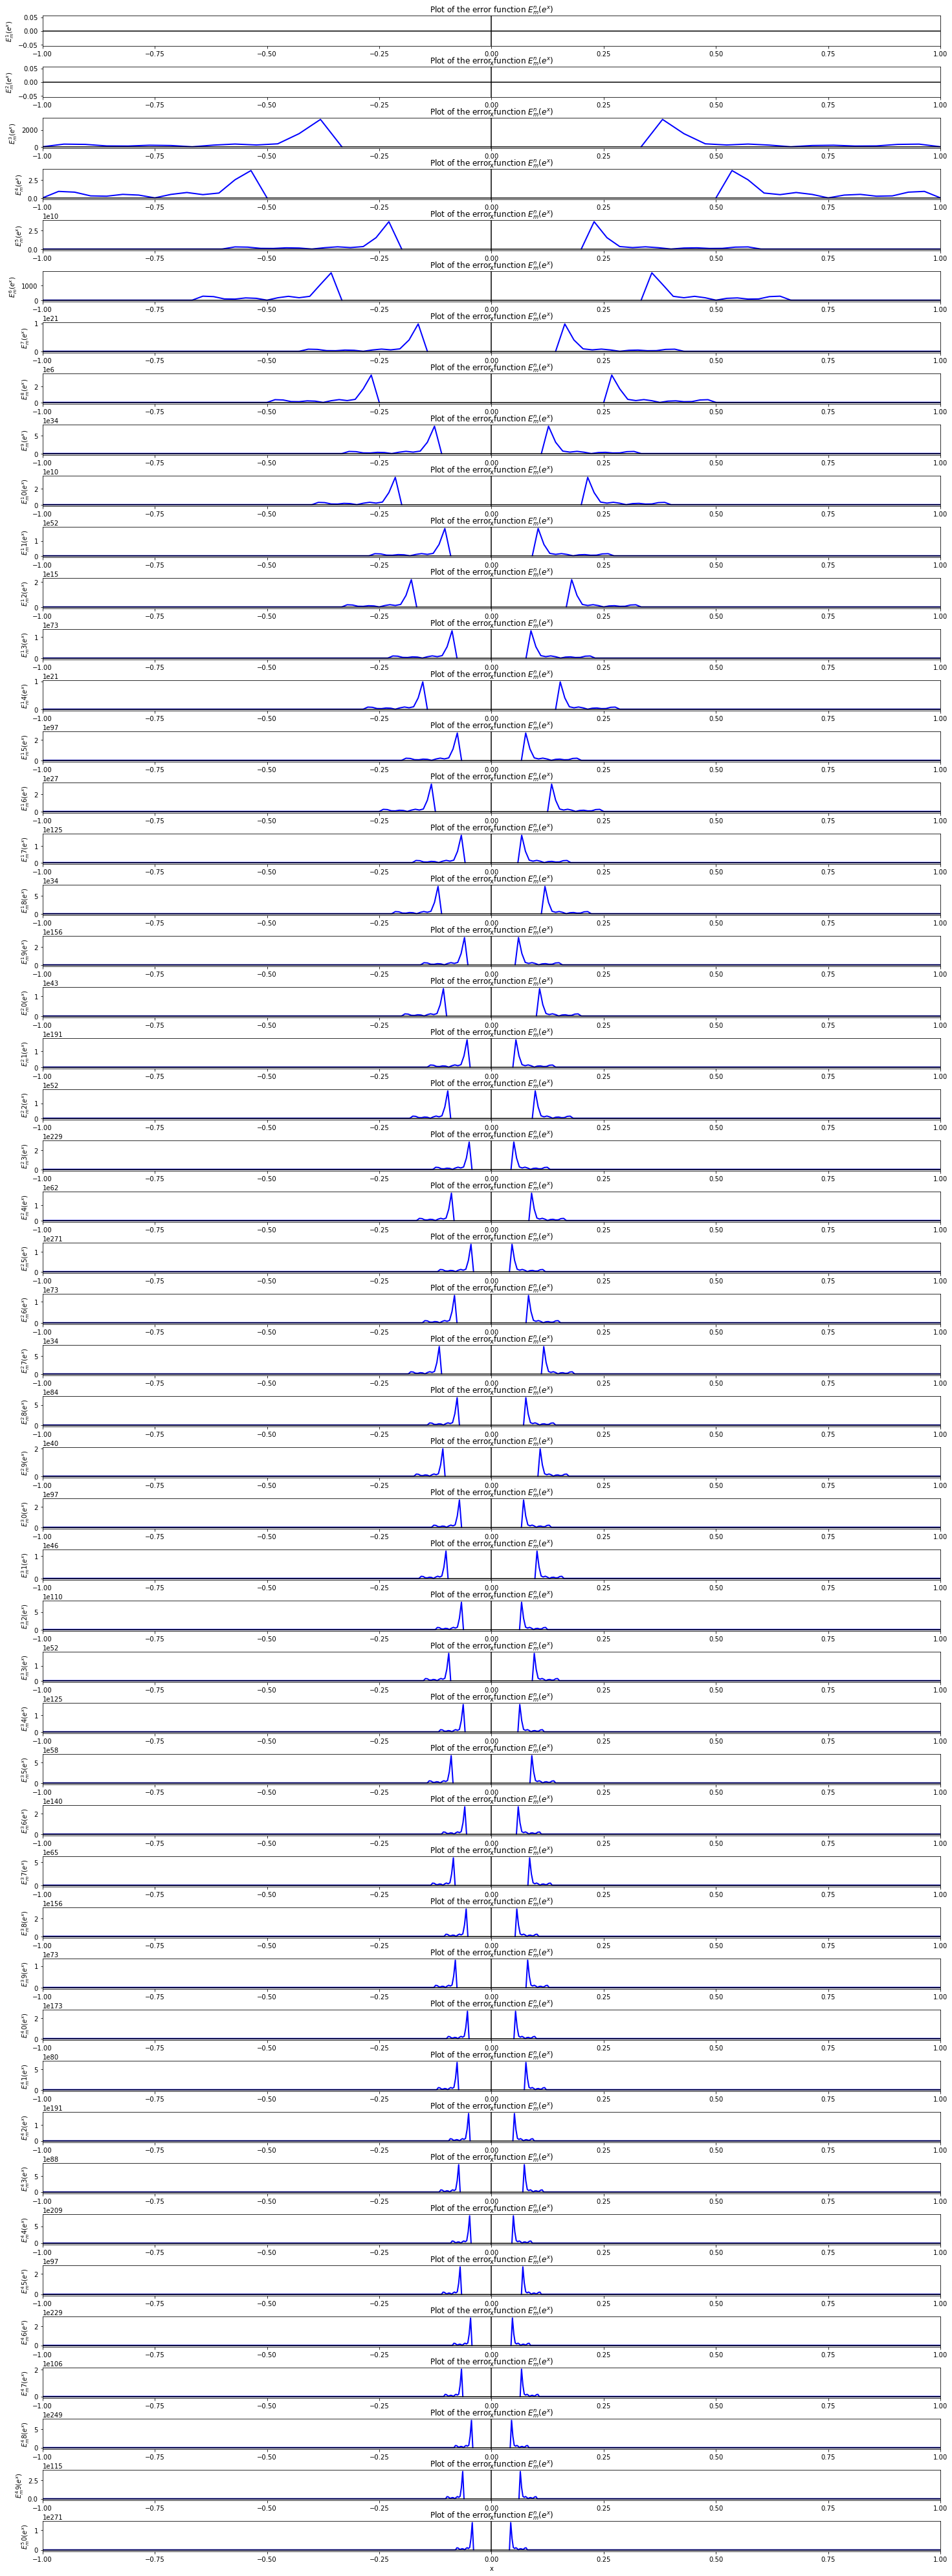

In [6]:
# For a NON C^∞: f(x)=e^(1/x^2) n->∞
f = lambda x: np.exp(1/x**2)
fig, ax = plt.subplots(50, 1, figsize=(20,55))
fig.tight_layout()
fig.subplots_adjust(hspace=.7)
for n in range(1,51):
    points, absolute_errors = piecewise_interp_error(f,-1,1,n,4,15)[:2]
    ax[n-1].plot(points, absolute_errors, linewidth=2, color='blue')
    ax[n-1].set_xlabel("x")
    ax[n-1].set_ylabel(fr"$E_m^{n}(e^x)$")
    ax[n-1].set_xlim(-1,1)
    ax[n-1].axhline(0, color='black')
    ax[n-1].axvline(0, color='black')
    ax[n-1].set_title(r"Plot of the error function $E_m^{n}(e^x)$")

So we see, that the error term not only doesn't converge it actually diverges at a neighbourhood of $0$, which should be expected. So for functions that do not fit the criteria of the theorem, we can't say anything about the convergence of the piecewise polynomial, and here was an example where the error term instead tends to infinity as $n\rightarrow\infty$.

___

$\underline {n\ constant\ \in\mathbb{N}\ while\ m\rightarrow\infty:}$

Here we analyze the convergence of our approximation, when the number of the nodal points of the partition $\mathbb{X}$ stays **constant** while the degree of the polynomials that intepolate $f$ at the sub-intervals increases to infinity. Recall the result that we proved at (\ref{eq:3}).

The problem here now, is that the upper-bound for the error term, is **weirdly associated** with $m$. To be thorough in our investigation, we will explore different cases of functions that we try to interpolate, and see how the uniform-norm of the error term behaves as a function of $m$, **only**.

First, we observe that for specific types of analytic functions, the term $M_{m+1}$ is uniformly bounded; this means that $\forall m\in \mathbb{N}, \ \exists M>0: M_{m+1}\leq M$, which means that the infinity-norm of the error term in these cases, converges to 0, with Big-O order of: 

\begin{equation*}
\mathcal{O}\left(\frac{C^{m+1}}{m+1}\cdot\frac{1}{m^{m+1}}\right)
\end{equation*}

This is ridiculously fast! This is of course attributed to the term $m^{m+1}$ at the denominator. Some implementations are shown below, in Python. Such functions are: 

1. $f(x)=$ (linear combination of $sin$'s and $cos$'s)
2. $f(x)=log(x)$ for appropriate intervals $[a,b]$.
3. $f(x)=e^{cx}$ for $c\leq 1$.
4. Combination of these, either linearly or multiplicatively.

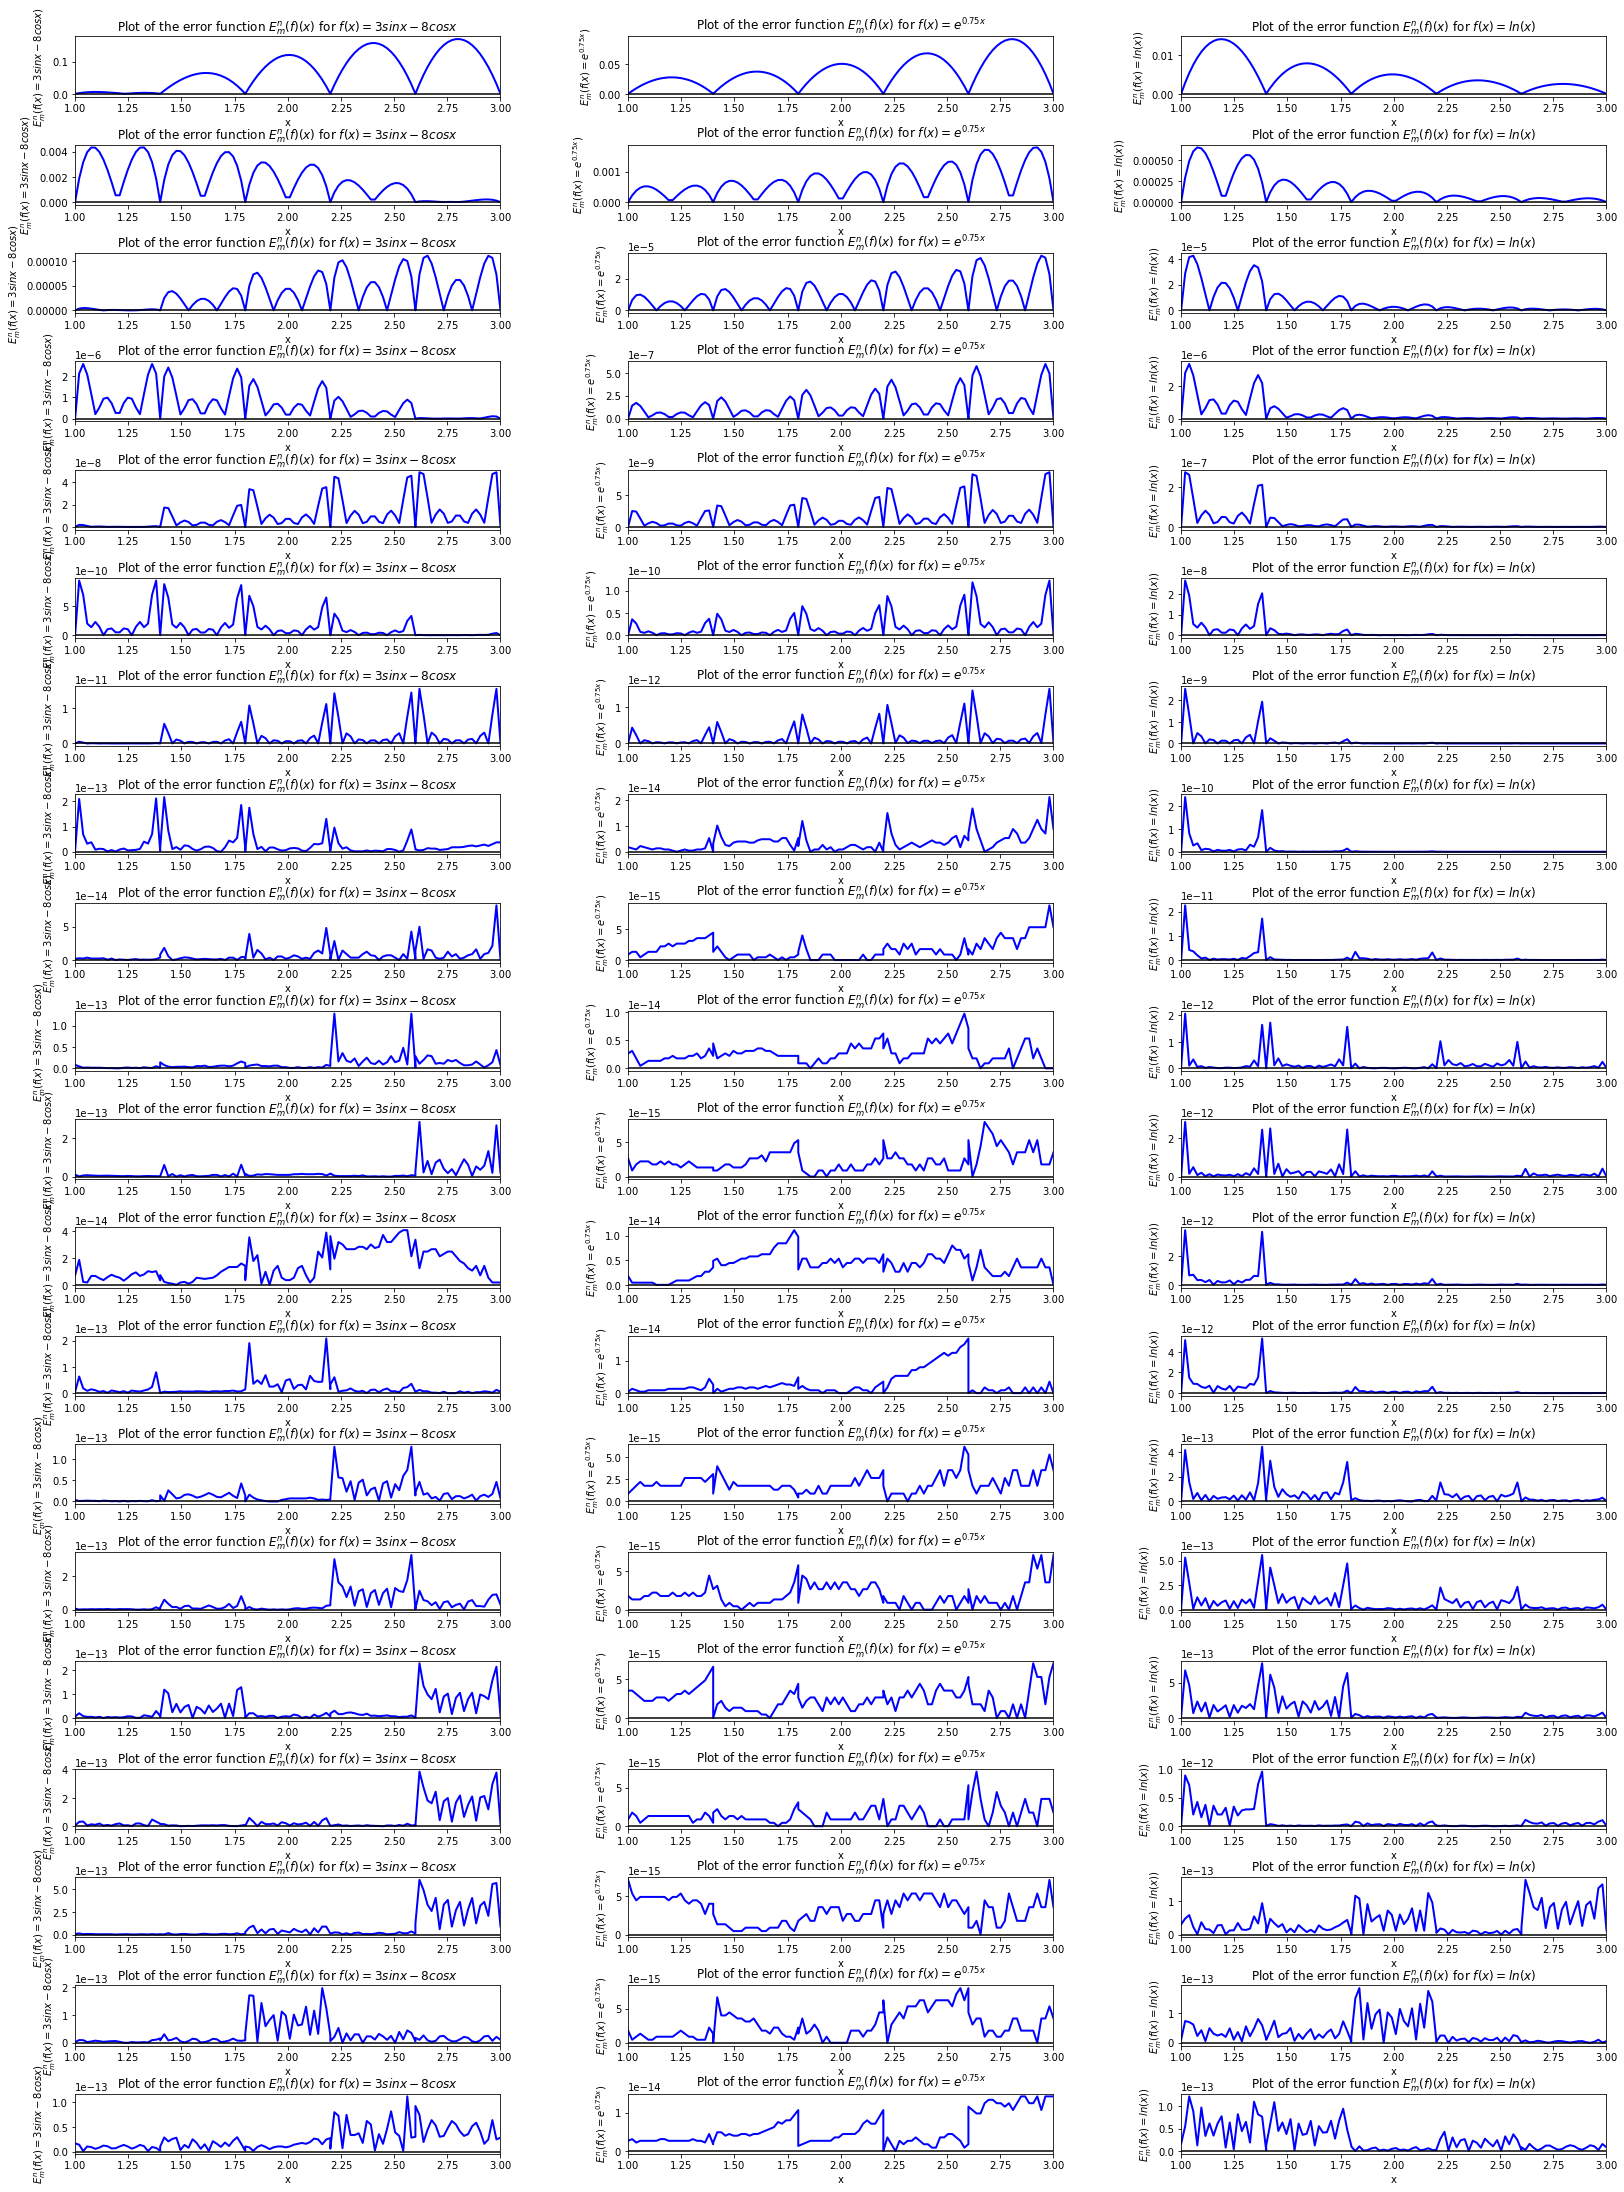

In [7]:
funs = [lambda x: 3*math.sin(x)-8*math.cos(x), lambda x: math.exp(0.75*x), lambda x: math.log(x)]
graph_names = [r"$f(x)=3sinx-8cosx$",r"$f(x)=e^{0.75x}$",r"$f(x)=ln(x)$"]
fig, ax = plt.subplots(20, 3, figsize=(22,30))
fig.tight_layout()
fig.subplots_adjust(hspace=.8,wspace=.3)
for (i, f), f_name in zip(enumerate(funs),graph_names):
    for m in range(1,21):
        points_100, absolute_errors_100 = piecewise_interp_error(f,1,3,5,m,22)[:2]
        ax[m-1,i].plot(points_100, absolute_errors_100, linewidth=2, color='blue')
        ax[m-1,i].set_xlabel("x")
        ax[m-1,i].set_ylabel(fr"$E_m^n$("+f_name+")")
        ax[m-1,i].set_xlim(1,3)
        ax[m-1,i].axhline(0, color='black')
        ax[m-1,i].axvline(0, color='black')
        ax[m-1,i].set_title(r"Plot of the error function $E_m^n(f)(x)$ for "+f_name)

As expected, the convergence is **EXTREMELY** fast.

___

Now we move to a different class of functions.
We know that if $f \notin L^2([a,b]) \therefore f \notin L^{\infty}([a,b]).$
If we take the functions $f(x)=x^\lambda, \ \lambda \in \mathbb{R}$ , we observe that the $m+1^{th}$ derrivative is equal to: 

\begin{align*}
f^{(m+1)}(x)&=\left(\prod_{k=0}^{m}(\lambda-k)\right)x^{\lambda-(m+1)}\\
\|f^{(m+1)}\|_2 &= \left(\int_a^b\left(\prod_{k=0}^{m}(\lambda-k)\right)^2x^{2\lambda-2m-2}dx\right)^{1/2}\\
&=\dots=\frac{\left(\prod_{k=0}^{m}(\lambda-k)\right)(b^{2(\lambda-m-1/2)}-a^{2(\lambda-m-1/2)})^{1/2}}{2(\lambda-m-1/2)}
\end{align*}

Now it is obvious that if $\lambda=m+\frac{1}{2}$ then $M_{m+1}=\infty$ which means that theorem (\ref{eq:3}), does not hold. Now, for other more "well-behaved" values of $\lambda$, we provide here a result the helps us specify the rate of convergence of our approximation:

For $f(x)=x^{\lambda}$ where $\lambda\neq m+\frac{1}{2}$, then the following upper-bound for the uniform-norm of the error holds:

\begin{equation} \label{eq:5} \tag{*'}
\|E_m^n(f)\|_{\infty} = \|f-l_m^n\|_{\infty} \leq C(m)\delta^{-\beta}
\end{equation}

where $\beta=min\left\{m+1,\lambda\right\}$, and $C(m)$ is a positive real number that depends on $m$. 

While we do not prove this theorem, we can "validate" it empirically, by letting $n\rightarrow\infty$, and observe the graph of $log(\|E_m^n(f)\|_{\infty})$ against $log(\delta)$, for functions of the form of $f(x)=x^{\lambda}$, for $m=3$ and letting $\lambda$ take values from the set $\{3.0,3.1.3.2,\dots,4.5\}$. We will see that for $\lambda<m+1$, that the slope of the line is extremely close to be equal to $\lambda$, while when $\lambda>m+1$ it is equal to roughly $m+1$, consistently!

In [8]:
# We check to see if the other theorem that we stated above, holds true.
# This is done in the following way:
deltas, errors = [], []
powers = np.linspace(3,4.5,16)
for i in powers:
    deltas.append([piecewise_interp_error(lambda x: x**i,0,1,n,3,10)[-1] for n in range(1,101)])
    errors.append([piecewise_interp_error(lambda x: x**i,0,1,n,3,10)[-2] for n in range(1,101)])
for j, power in enumerate(powers.tolist()):    
    slope=(math.log(errors[j][-1])-math.log(errors[j][-2]))/(math.log(deltas[j][-1])-math.log(deltas[j][-2]))
    print(f"The slope is: {slope}, for lambda equal to {power} and m=3")

The slope is: -0.0, for lambda equal to 3.0 and m=3
The slope is: 3.0999999999667716, for lambda equal to 3.1 and m=3
The slope is: 3.199999999981972, for lambda equal to 3.2 and m=3
The slope is: 3.2999999999816185, for lambda equal to 3.3 and m=3
The slope is: 3.3999999999932835, for lambda equal to 3.4 and m=3
The slope is: 3.499999999995051, for lambda equal to 3.5 and m=3
The slope is: 3.5999999999946977, for lambda equal to 3.6 and m=3
The slope is: 3.6999999999943443, for lambda equal to 3.7 and m=3
The slope is: 3.7999999999943443, for lambda equal to 3.8 and m=3
The slope is: 3.899999999995051, for lambda equal to 3.9 and m=3
The slope is: 3.9996996306019152, for lambda equal to 4.0 and m=3
The slope is: 3.99974092106135, for lambda equal to 4.1 and m=3
The slope is: 3.999207816212717, for lambda equal to 4.2 and m=3
The slope is: 3.9985242053100274, for lambda equal to 4.3 and m=3
The slope is: 3.9992803871212232, for lambda equal to 4.4 and m=3
The slope is: 3.99788126048848

So we observe that, for cases that $m+1$ is larger than $\lambda$, for functions of the form of $f(x)=x^\lambda$, the convergence in terms of n, is actually **worse** than in (\ref{eq:3}), because the rate of convergence is now $\lambda$, due to (\ref{eq:5}). In these cases, it is easy to see that for intervals away from a small neighbourhood of 0, that it is better to let $m\rightarrow\infty$ instead of $n\rightarrow\infty$, because with the former, the convergence is much much faster, as we can compare below in a specific example for $f(x)=x^{2.1}$ in $[0,1]$:

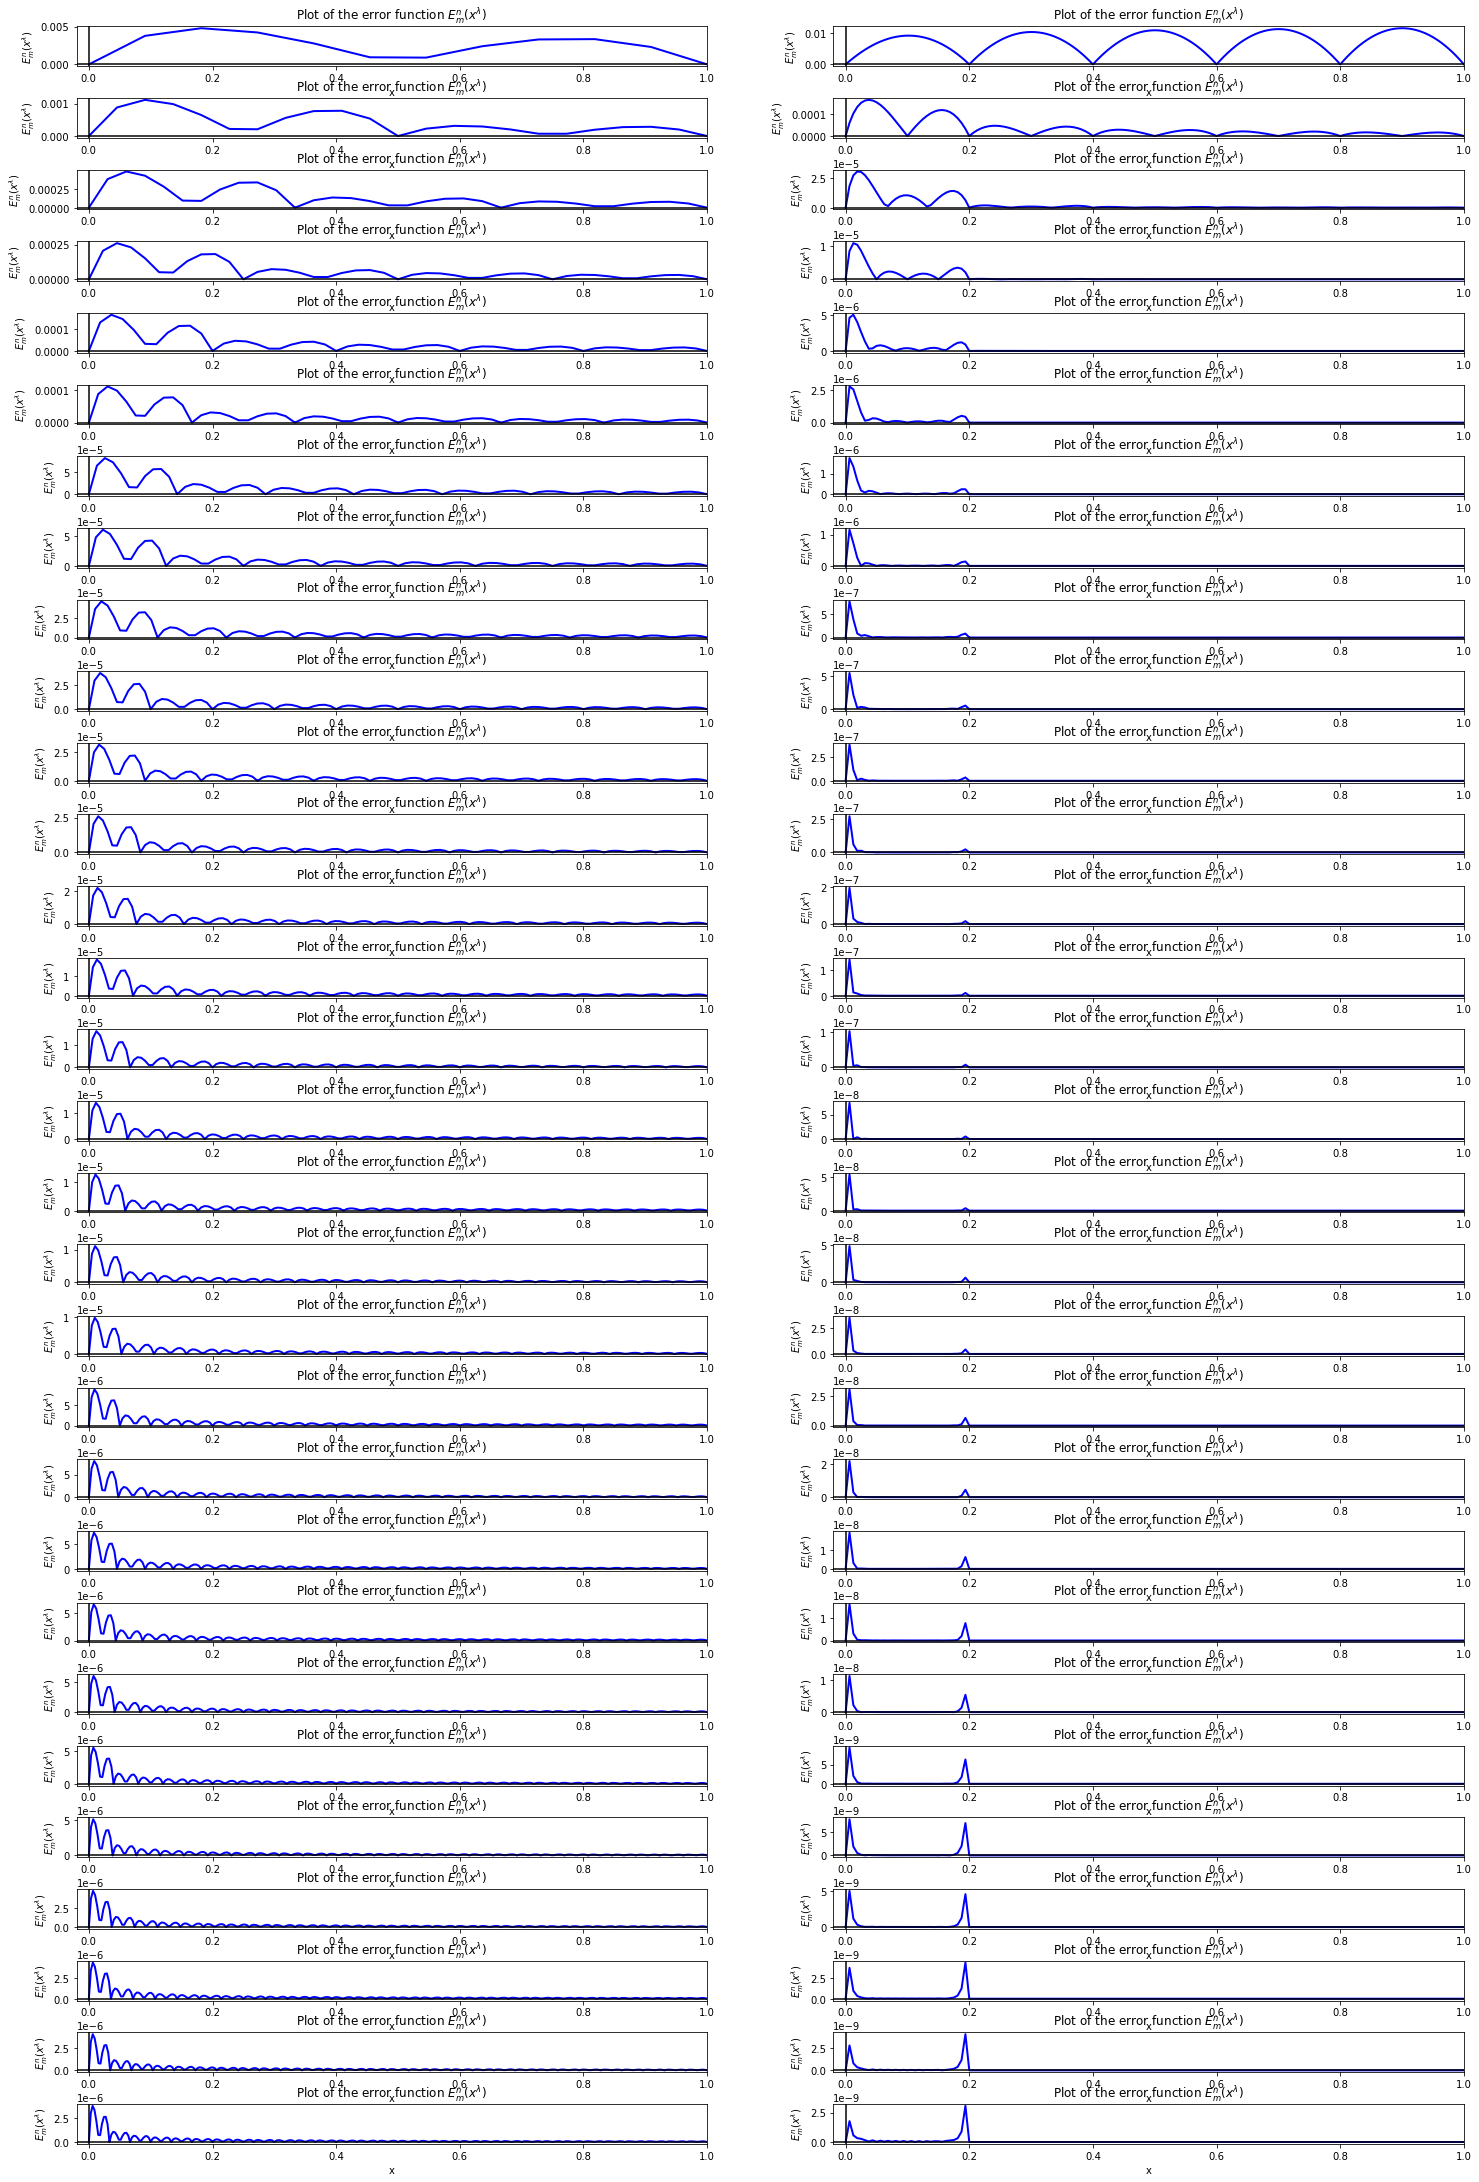

In [9]:
# For lambda<m+1 with n->∞, and m constant, equal to 10.
f = lambda x: x**2.1
fig, ax = plt.subplots(30, 2, figsize=(20,30))
fig.tight_layout()
fig.subplots_adjust(hspace=.8,wspace=.2)
for n in range(1,31):
    points, absolute_errors = piecewise_interp_error(f,0,1,n,2,12)[:2]
    ax[n-1,0].plot(points, absolute_errors, linewidth=2, color='blue')
    ax[n-1,0].set_xlabel("x")
    ax[n-1,0].set_ylabel(r"$E_m^n(x^{\lambda})$")
    ax[n-1,0].set_xlim(-0.02,1)
    ax[n-1,0].axhline(0, color='black')
    ax[n-1,0].axvline(0, color='black')
    ax[n-1,0].set_title(r"Plot of the error function $E_m^n(x^{\lambda})$")
    
# For a=2.5 again, now with m->∞ and n constant and equal to 5.
f = lambda x: x**2.1
for m in range(1,31):
    points, absolute_errors = piecewise_interp_error(f,0,1,5,m,33)[:2]
    ax[m-1,1].plot(points, absolute_errors, linewidth=2, color='blue')
    ax[m-1,1].set_xlabel("x")
    ax[m-1,1].set_ylabel(r"$E_m^n(x^{\lambda})$")
    ax[m-1,1].set_xlim(-0.02,1)
    ax[m-1,1].axhline(0, color='black')
    ax[m-1,1].axvline(0, color='black')
    ax[m-1,1].set_title(r"Plot of the error function $E_m^n(x^{\lambda})$")

The example above showcases that empirically for functions of this form, it is better to let $m\rightarrow\infty$, instead of $n\rightarrow\infty$.

___

Now we are left with the possibility of functions that their derivatives are not uniformly bounded with respect to $m$. Such an example is $f(x)=e^{x^2}$. This function has derivatives that with each derivation "grow in magnitude". What we mean is that, if we see the first 5 derivatives of this function:

1. $2x\mathrm{e}^{x^2}$

2. $\left(4x^2+2\right)\mathrm{e}^{x^2}$

3. $\left(8x^3+12x\right)\mathrm{e}^{x^2}$

4. $\left(16x^4+48x^2+12\right)\mathrm{e}^{x^2}$

5. $\left(32x^5+160x^3+120x\right)\mathrm{e}^{x^2}$

It is easy to see that, if we try to interpolate this function in an interval like $[-5,5]$ these functions grow in stupidly high sizes, in their uniform-norm! This might leave some to think that our approximation will not converge in $m$ due to their size, but this is far from the case. For $n$, while our approximation will indeed converge if we let $n\rightarrow\infty$ due to its "sure-fire" nature (see theorem (\ref{eq:3})), we might as well prepare ourselves for the heat death of the universe, because it is then that this approximation will indeed converge, for small values of m. But for $m\rightarrow\infty$, while these derivatives grow in exorbitant values, we have that the upper-bound of the error term is divided by the term $m^{m+1}$ (as well as $(m+1)n^{m+1}$ ). This number grows **VERY FAST** - for example for $m=80$ we can calculate that $80^{81}=1.413478\cdot10^{+154}$. This term does not take too long to overcome the magnitude of $M_{m+1}$. In these cases too, is where we see that letting $m\rightarrow\infty$ is the best option compared to the two. This is showcased below, which also marks the end of our paper.

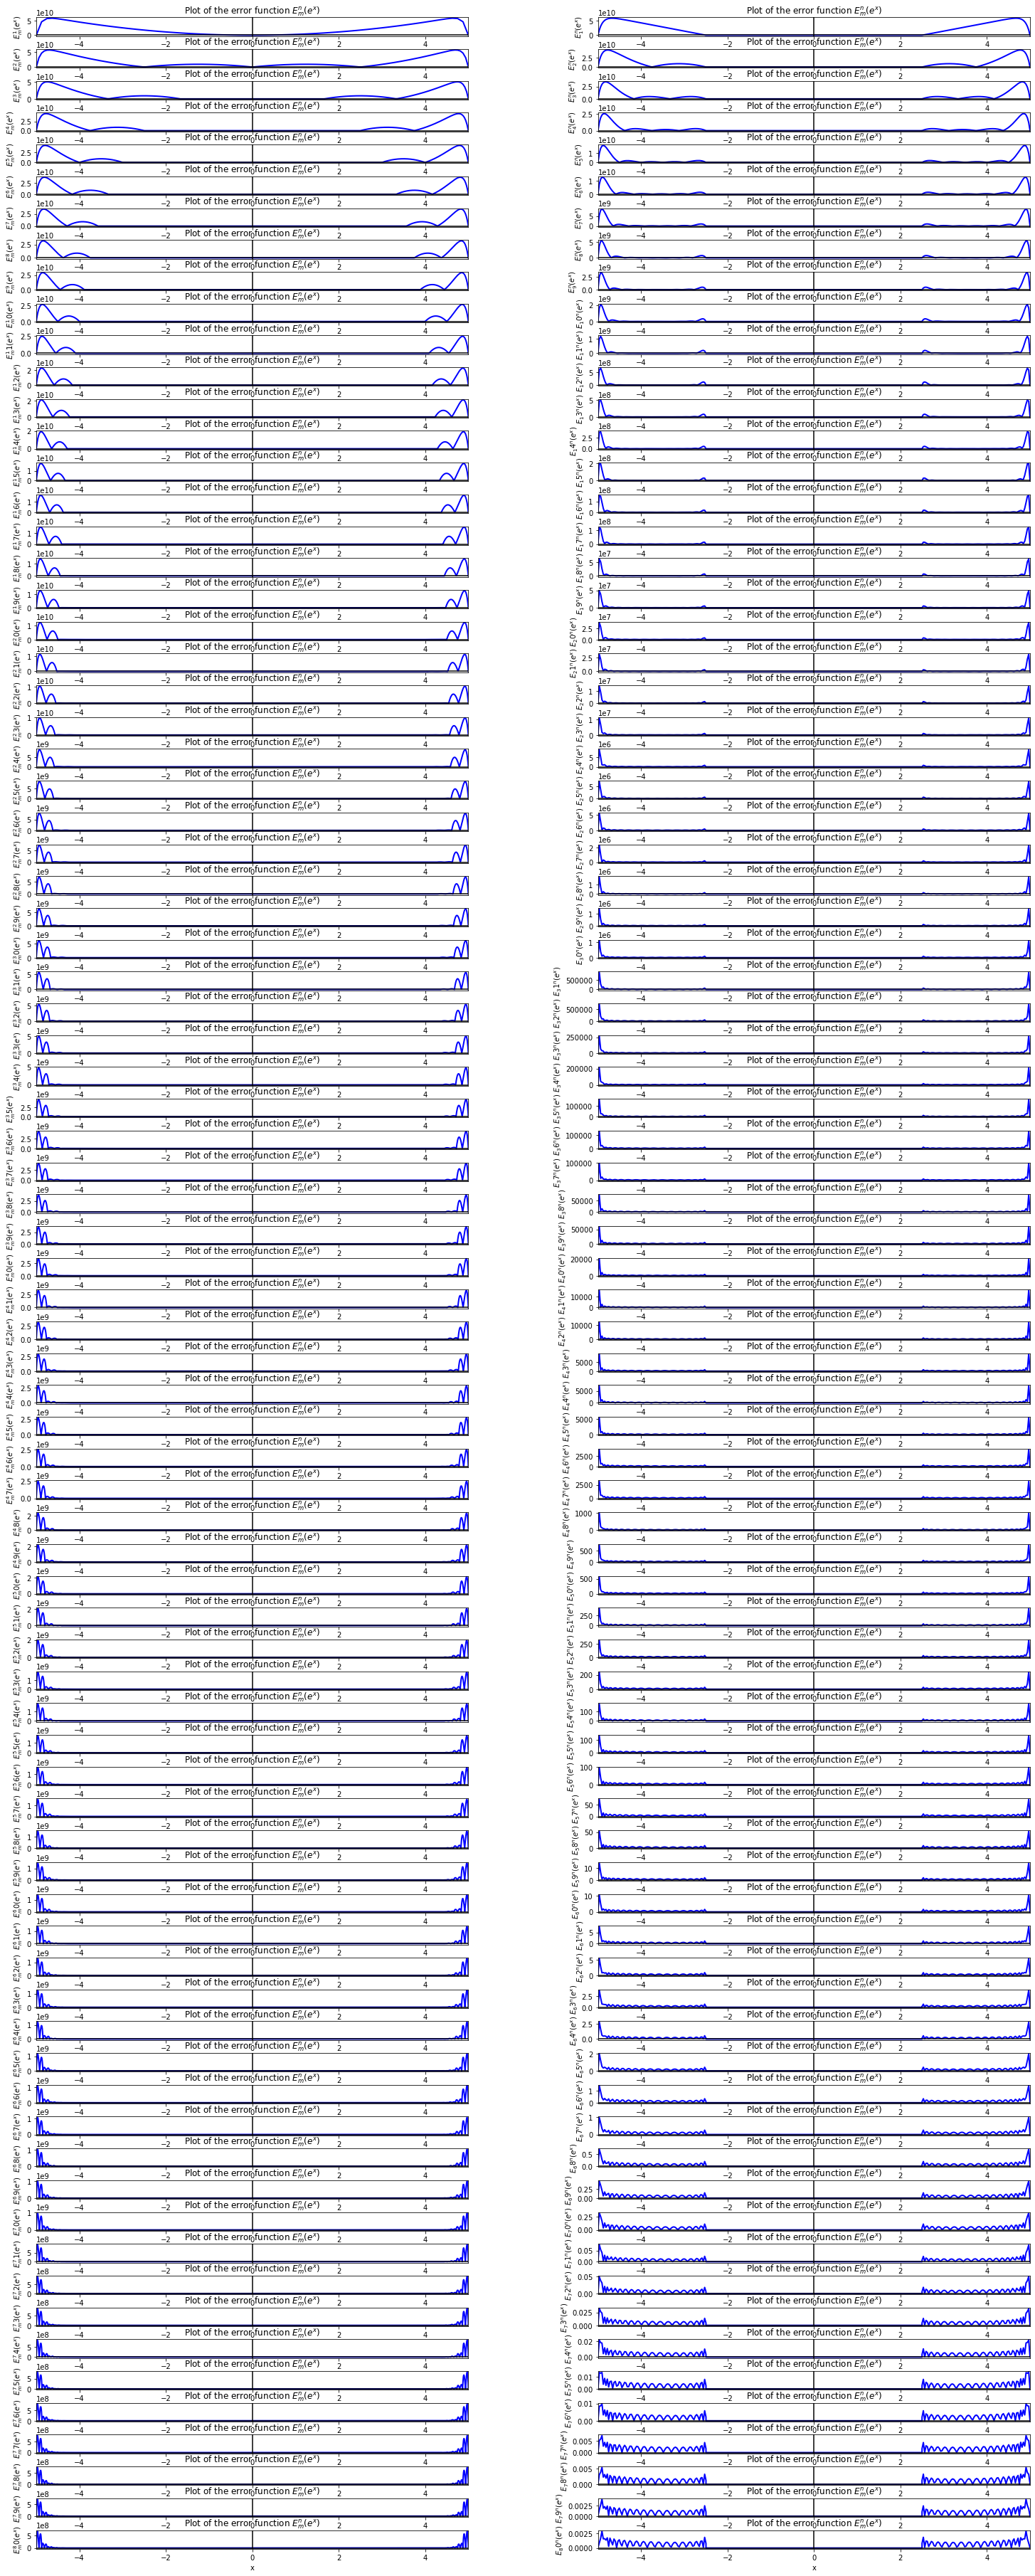

In [10]:
f = lambda x: np.exp(x**2)
fig, ax = plt.subplots(80, 2, figsize=(20,50))
fig.tight_layout()
fig.subplots_adjust(hspace=.7, wspace=.3)
for n in range(1,81):
    points, absolute_errors = piecewise_interp_error(f,-5,5,n,2,82)[:2]
    ax[n-1,0].plot(points, absolute_errors, linewidth=2, color='blue')
    ax[n-1,0].set_xlabel("x")
    ax[n-1,0].set_ylabel(fr"$E_m^{n}(e^x)$")
    ax[n-1,0].set_xlim(-5,5)
    ax[n-1,0].axhline(0, color='black')
    ax[n-1,0].axvline(0, color='black')
    ax[n-1,0].set_title(r"Plot of the error function $E_m^{n}(e^x)$")
for m in range(1,81):
    points, absolute_errors = piecewise_interp_error(f,-5,5,4,m,82)[:2]
    ax[m-1,1].plot(points, absolute_errors, linewidth=2, color='blue')
    ax[m-1,1].set_xlabel("x")
    ax[m-1,1].set_ylabel(fr"$E_{m}^n(e^x)$")
    ax[m-1,1].set_xlim(-5,5)
    ax[m-1,1].axhline(0, color='black')
    ax[m-1,1].axvline(0, color='black')
    ax[m-1,1].set_title(r"Plot of the error function $E_{m}^n(e^x)$")

___

$\underline {Conclusion:}$

The problem we study in the present project is related to the numerical solution of differential equations (D.E.). The solutions of some D.E. are in the form $f(x) = x^\alpha$, with $\alpha$ constant (not necessarily an integer). The value of $\alpha$ determines the normality of the function. For example, if $\alpha$ is a positive integer then $f$ is a polynomial and therefore can be approximated by a polynomial with error of 0. If, however, $\alpha$ is not an integer, e.g. $\alpha$  = 1.001, then it is easy to see that $f \in C^1 ([0,1])$ but $f \not\in C^2 ([0,1])$. If, e.g. $\alpha$ = 0.998, then $f \in C^0 ([0,1])$ but $f\not\in C^1 ([0,1])$. Thus, by varying the value of $\alpha$ we can study functions with different smoothness levels.

The approach for the solution of a D.E. usually starts with selecting a grid and some (partial) polynomials so that the error is as small as possible. These choices depend on the smoothness of the (expensive) solution, something we often know in practice. This work will help us, in part, to make the right choices.